#### Jueves 8 de Mayo de 2025

## Árbol de Decisión ID3. ¿Es un buen candidato para un trabajo?

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Dataset

data = {
    'Candidato': ['A', 'B', 'C'],
    'Experiencia': ['Sí', 'No', 'Sí'],
    'Titulado': ['No', 'Sí', 'Sí'],
    'HabilidadesBlandas': ['Sí', 'No', 'Sí'],
    'Contratado': ['Sí', 'No', 'Sí']
}

df = pd.DataFrame(data)
print("Dataset original: \n")
print(df)

Dataset original: 



,Candidato,Experiencia,Titulado,HabilidadesBlandas,Contratado
0,A,Sí,No,Sí,Sí
1,B,No,Sí,No,No
2,C,Sí,Sí,Sí,Sí


In [ ]:
#Codificación de variables categóricas a numéricas

le = LabelEncoder()
df_encoded = df.copy()
for columna in df.columns:
    df_encoded[columna] = le.fit_transform(df[columna])

print("\nDataset codificado: \n")
print(df_encoded)


Dataset codificado: 



,Candidato,Experiencia,Titulado,HabilidadesBlandas,Contratado
0,0,1,0,1,1
1,1,0,1,0,0
2,2,1,1,1,1


In [12]:
#Separacion de carcaterísticas (X) y (y)
X = df_encoded.drop(['Candidato', 'Contratado'], axis=1)
y = df_encoded['Contratado']

In [13]:
#Entrenamiento del árbol de decisión
modelo = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)

modelo.fit(X, y)

print("Profundidad real del árbol:", modelo.get_depth())
print("Número de hojas:", modelo.get_n_leaves())

Profundidad real del árbol: 1
Número de hojas: 2


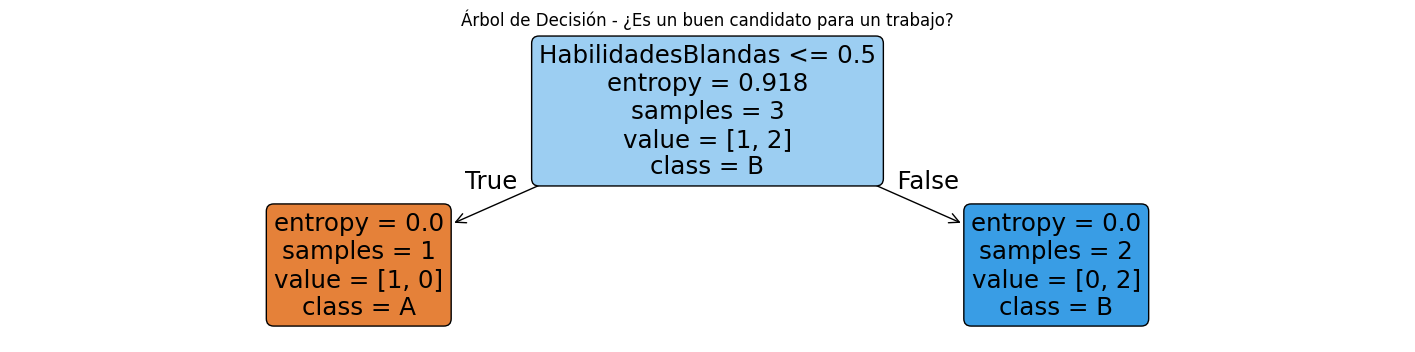

In [17]:
#Visualización del Árbol de Decisión
plt.figure(figsize=(18, 4))
plot_tree(
    modelo, 
    feature_names = X.columns,
    class_names = df['Candidato'].unique(),
    filled = True,
    rounded = True
)
plt.title('Árbol de Decisión - ¿Es un buen candidato para un trabajo?')
plt.show()

In [18]:
# Predicciones

# Experiencia: 1=Sí 0=No	
# Titulado: 1=Sí 0=No		
# HabilidadesBlandas 1=Sí 0=No	

print("PREDICCIÓN - ¿ES UN BUEN CANDIDATO PARA UN TRABAJO?\n")

nuevo_dia = {
    'Experiencia': 1,
    'Titulado': 1,
    'HabilidadesBlandas': 0
}

nuevo_df = pd.DataFrame([nuevo_dia])

for atributo, valor in nuevo_dia.items():
    print(f"{atributo}: {valor}")

prediccion = modelo.predict(nuevo_df)

print("\nPredicción para el nuevo día:")
if prediccion[0] == 1:
    print("\nEs buen candidato para el trabajo")
else:
    print("\nNo es candidato para el trabajo")

PREDICCIÓN - ¿ES UN BUEN CANDIDATO PARA UN TRABAJO?

Experiencia: 1
Titulado: 1
HabilidadesBlandas: 0

Predicción para el nuevo día:

No es candidato para el trabajo


In [19]:
# Importancia de cada atributo

# feature_importances_: muestra la importancia de cada característica en el modelo. 
# Cuanto mayor sea el valor, más relevante es esa característica para las decisiones del árbol de decisión.

importancias = modelo.feature_importances_ 

print("\nImportancia de cada atributo\n")
for atributo, importancia in zip(X.columns, importancias):
    print(f"{atributo} -> {importancia}")


Importancia de cada atributo

Experiencia -> 0.0
Titulado -> 0.0
HabilidadesBlandas -> 1.0


####  Calcula la ganancia de información para "Experiencia". ¿Qué atributo es redundante?

In [20]:
# La ganacia de información para experiencia es de 0.0

# Experiencia y Titulado son redundantes porque, al parecer no aportan nada para predecir si 
# un candidato será Contratado. Esto puede indicar que estos atributos no están influyendo de 
# manera significativa en la decisión, y HabilidadesBlandas es el único atributo relevante.